In [1]:
!pip install pingouin

     |████████████████████████████████| 182 kB 982 kB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 32.6 MB 450 kB/s            
     |████████████████████████████████| 827 kB 2.3 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193645 sha256=1eb5c1682213a42c2e4af042d9a90ae5f25a19ae6a8261a1549ff04c5d42a9c5
  Stored in directory: /Users/prajwalkrishn/Library/Caches/pip/wheels/61/fe/b5/340c9d5290780d6eafcf38988adbb46f82df2301ef7a0996ea
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7049 sha256=6265c2f1f8711c915c73d443ba13410ca8cb0c0c24bcb577561fc0cfc848d9ec
  Stored in directory: /Users/prajwalkrishn/Library/Caches/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2
    Uninstalling scipy-1

In [87]:
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import mannwhitneyu
import pingouin as pg

In [88]:
data_level_A = pd.read_csv("precision_levelA.csv")

In [89]:
data_level_A.head()

,Class,PAC,SGD,KNN,GradientBoost,MLP
0,Offensive,93,91,43,66,89
1,Non-Offensive,98,90,95,86,96
2,NAN,0,0,0,0,0


In [90]:
data_level_A.mean(axis = 0)

PAC              63.666667
SGD              60.333333
KNN              46.000000
GradientBoost    50.666667
MLP              61.666667
dtype: float64

#### Looks like the mean is higher in the PAC algorithmn, we might be tempted to say PAC is best but let us conduct more analysis and tests on this precision data set

<AxesSubplot:>

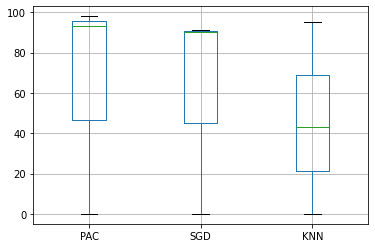

In [91]:
data_level_A.boxplot(column=['PAC','SGD','KNN'])

<AxesSubplot:>

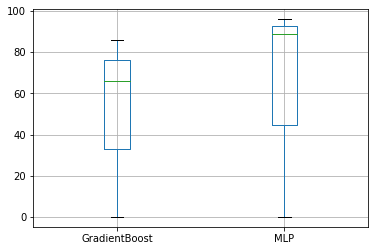

In [92]:
data_level_A.boxplot(column=['GradientBoost',"MLP"])

#### The box plot doesnt give any extra information than what we obtained by calculating the mean, it is just a visual representation

# Hypothesis Testing

- Null hypothesis (H0) - There is no difference in the mean precision.
- Alternate hypothesis (H1) - The difference is significant.
- t-test is used for the same, as the classifiers are run on the same dataset, we perform paired t-test.
- p-value is P(D|H0), so smaller the p-value, more confident we are of Null Hypothesis being false.
- If they are below siginificance level like 0.05 or 0.01 then we can reject the null hypothesis.

In [93]:
data_level_A.head()

,Class,PAC,SGD,KNN,GradientBoost,MLP
0,Offensive,93,91,43,66,89
1,Non-Offensive,98,90,95,86,96
2,NAN,0,0,0,0,0


In [170]:
#print(data_level_A.iloc[:,1], data_level_A.iloc[:,2])
print(data_level_A.iloc[:,1:])
some_data = data_level_A.iloc[:,1:]

   PAC  SGD  KNN  GradientBoost  MLP
0   93   91   43             66   89
1   98   90   95             86   96
2    0    0    0              0    0


In [175]:
some_data.iloc[:,0]

0    93
1    98
2     0
Name: PAC, dtype: int64

In [95]:
stats.ttest_rel(data_level_A.iloc[:,1], data_level_A.iloc[:,2])

Ttest_relResult(statistic=1.3867504905630728, pvalue=0.2998599579859951)

In [96]:
stats.ttest_rel(data_level_A.iloc[:,2], data_level_A.iloc[:,4])

Ttest_relResult(statistic=1.2468073831378084, pvalue=0.33868502701077463)

In [97]:
stats.ttest_rel(data_level_A.iloc[:,3], data_level_A.iloc[:,4])

Ttest_relResult(statistic=-0.4897979999789237, pvalue=0.6727327924514709)

In [98]:
stats.ttest_rel(data_level_A.iloc[:,1], data_level_A.iloc[:,2])

Ttest_relResult(statistic=1.3867504905630728, pvalue=0.2998599579859951)

In [176]:
stats.ttest_rel(some_data.iloc[:,0], some_data.iloc[:,1])

Ttest_relResult(statistic=1.3867504905630728, pvalue=0.2998599579859951)

In [100]:
pg.rm_anova(data_level_A.iloc[:,1:5])

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,Within,3,6,1.062291,0.432126,0.346894,0.358842


In [109]:
data_level_A.head()

,Class,PAC,SGD,KNN,GradientBoost,MLP
0,Offensive,93,91,43,66,89
1,Non-Offensive,98,90,95,86,96
2,NAN,0,0,0,0,0


In [183]:
off = [.93,.43]#,.43]#,.66,.89]
non_off = [.98,.95]#,.95,.86,.96]
U1, p = mannwhitneyu(some_data.iloc[:,0],some_data.iloc[:,3],method="asymptotic")

In [184]:
U1

6.5

In [185]:
p

0.5065551690490403